In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import log, sqrt, exp, pi, cos
from scipy import stats as st
import seaborn as sns
sns.set(color_codes=True)

sns.set_palette(sns.color_palette("Set2"))
sns.set(rc={'figure.figsize':(10,8)}, style="white", color_codes=True)


import warnings
warnings.filterwarnings("ignore")

<h2 style="text-align: center; font-size: 30px; text-align: center; margin-bottom: 40px;">Trabajo Práctico 1</h2>

<div style="border: 1px solid #d2d2d2; border-top: none; border-radius: 8px; margin-bottom: 40px;">
    <h2 style="text-align: center; font-weight: bold; font-size: 20px; padding: 10px 20px; background-color: #38a2ad; color: #fff; border-radius: 4px; margin-bottom: 20px; margin-top: 0; border-bottom-left-radius: 0;  border-bottom-right-radius: 0;">Alumnos</h2>
    <div style="width: 450px; margin: 0 auto 30px;">
        <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 18px; font-weight: bold; color: #363636; line-height: 40px;">Nombre y Apellido</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 18px; font-weight: bold; color: #363636; line-height: 40px;">Padrón</p>
            </div>
        </div>
        <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">Gaston Montes</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">89397</p>
            </div>
        </div>
         <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2; background-color: #f4f4f4;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">Lucas Risaro</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">94335</p>
            </div>
        </div>
         <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">Alcala Santiago</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">95172</p>
            </div>
        </div>
        <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">Mauro Di Pietro</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">93695</p>
            </div>
        </div>
    </div>
</div>

<h2 style="text-align: center; font-weight: bold; font-size: 20px; padding: 10px 20px; background-color: #db2e2e; color: #fff; border-radius: 4px; margin-bottom: 30px;">Grupo</h2>

### Ejercicio 1
Utilizando  Matlab, Octaveo  Python implementar  un  Generador  Congruencial  Lineal  (GCL)  de  módulo $2^{32}$, multiplicador 1013904223,  incremento  de 1664525 y  semilla igual  a  la  parte  entera  del  promedio de  los  números de  padrón  de  los integrantes del grupo.
* Informar los primeros 10 números al azar de la secuencia.
* Modificar el GCL para que devuelva números al azar entre 0 y 1
* Realizarun histograma mostrando 100.000 valores generados en el punto b.
valores generados.

---

**Método Lineal Congruente [Lehmer, 1949] **

$U(n) = (Ua(n-1) + c)\mod m, \quad n\geq 0$

$m, \quad \text {el modulo};\quad 0<m$

$a,\quad \text{el multiplicador};\quad 0\geq a < m$

$c, \quad \text{el incremento}; \quad 0\geq c < m$

$U_{0}, \quad \text{la semilla, o valor inicial};\quad 0\leq U_{0}< m$

Para generar números al azar entre 0 y 1, dividimos los valores obtenidos con el GCL por $m$

In [13]:
m = 2**32 
a = 1013904223
c = 1664525
U0 = int((94335 + 89397 + 95172 + 93965)/4)

Un = {}
Un[0] = U0

def U(n):
    if (n in Un) :
        return Un[n]
    else:
        Un[n] = (a*U(n-1) + c) % m
        return Un[n]

# Primeros 10 Números Aleatorios
for i in range(1,11):
    print(U(i))

2356271436
1581526337
1615389740
1185142369
2500986636
1168271233
3037413868
2185355425
535991500
3724820929


In [14]:
#100.000 valores random generados entre 0 y 1
randomNums1 = list()
for i in range(0,100000):
    x = U(i+1)
    randomNums1.insert(i,x/m)

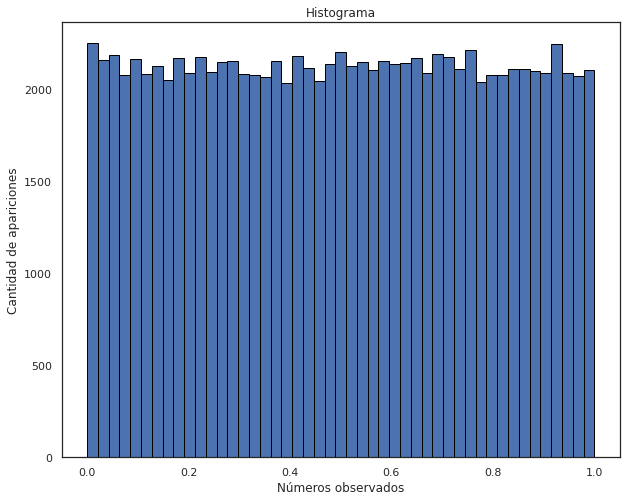

In [15]:
plt.xlabel('Números observados')
plt.ylabel('Cantidad de apariciones')
plt.title('Histograma')

sns.distplot(randomNums1,  kde=False,  hist_kws={'edgecolor':'black', 'alpha':1})
sns.set(style="white", context="talk")

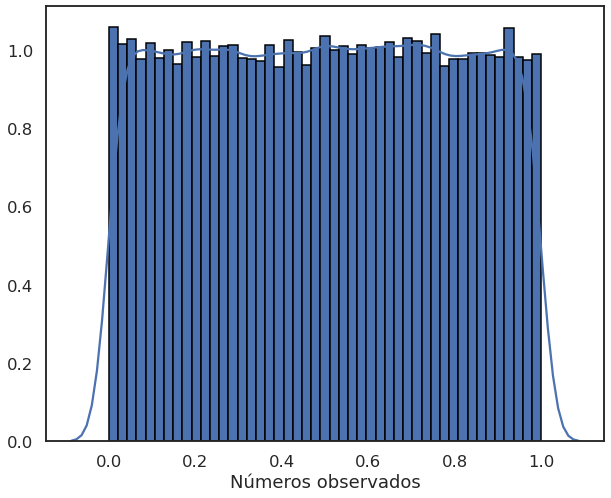

In [16]:
plt.xlabel('Números observados')

sns.distplot(randomNums1,  hist_kws={'edgecolor':'black', 'alpha':1})
sns.set(style="white", context="talk")